<a href="https://colab.research.google.com/github/andres-merino/MatematicasDiscretas-Virtual-05-N0279/blob/main/pages/clases/clase15/AplicacionGrafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Catálogo STEM</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Práctica de grafos en Python
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Septiembre 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Ejercicios práctico</font>
---

### 1. Librerías

In [1]:
# Librerías básicas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### 2. Carga del conjunto de datos

En esta actividad vamos a trabajar con un conjunto de datos relacionados con el tráfico aéreo. Este conjunto, que se encuentra disponible en los siguientes ficheros:

- `nodes.csv`: contiene todos los aeropuertos del mundo, identificados por su código de tres letras y complementado por su latitud, longitud y nombre completo.

- `links.csv`: contiene las rutas aéreas de distintas compañías aéreas (tercera columna) entre dos aeropuertos (primera columna y segunda columna).

Puedes descargar estos archivos [aquí](https://github.com/andres-merino/MatematicasDiscretas-Virtual-05-N0279/blob/main/pages/clases/clase15/nodes.csv) y [aquí](https://github.com/andres-merino/MatematicasDiscretas-Virtual-05-N0279/blob/main/pages/clases/clase15/links.csv). Luego cargarlos en tu entorno de trabajo para comenzar a explorar los datos.

In [5]:
# Leo los archivos nodes y links
nodes = pd.read_csv("nodes.csv")
links = pd.read_csv("links.csv")

# Reviso los datos
display(nodes.head())
display(links.head())

,id,latitude,longitude,Label
0,SJO,9.9939,-84.2089,San Jose Juan Santamaria Apt
1,NOB,9.9765,-85.6530,Nosara
2,LIO,9.9581,-83.0219,LIMON INTL
3,SYQ,9.9572,-84.1428,San Jose Tobias Bolanos Apt
4,VKG,9.9497,105.1337,Rachgia


,Source,Target,Airline
0,AER,KZN,2B
1,ASF,KZN,2B
2,ASF,MRV,2B
3,CEK,KZN,2B
4,CEK,OVB,2B


In [6]:
# Elimino la columna Airline
links = links.drop("Airline", axis=1)
display(links.head())

,Source,Target
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [7]:
# Creo el grafo
G = nx.from_pandas_edgelist(links, "Source", "Target")

### 3. Análisis exploratorio

In [11]:
# Numero de nodos
print("Numero de nodos:", G.number_of_nodes())
# Numero de aristas
print("Numero de nodos:", G.number_of_edges())
# Grado medio
print("Grado medio:", np.mean(list(dict(G.degree()).values())))
# Connectividad
print("Connectividad:", nx.is_connected(G))

Numero de nodos: 3425
Numero de nodos: 19257
Grado medio: 11.244963503649634
Connectividad: False


Tomamos la máxima componente conexa:

In [9]:
# Tomo la componente conexa mas grande
G_max = max(nx.connected_components(G), key=len)
G_max = G.subgraph(G_max).copy()

In [10]:
# Numero de nodos
print("Numero de nodos:", G_max.number_of_nodes())
# Numero de aristas
print("Numero de nodos:", G_max.number_of_edges())
# Grado medio
print("Grado medio:", np.mean(list(dict(G_max.degree()).values())))
# Connectividad
print("Connectividad:", nx.is_connected(G_max))

Numero de nodos: 3397
Numero de nodos: 19231
Grado medio: 11.322343244038859
Connectividad: True


Dibujamos la secuencia de grados:

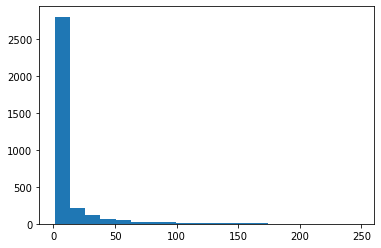

In [12]:
# Secuencia de grados
seq_grados = list(dict(G_max.degree()).values())
# Grafico histograma
plt.hist(seq_grados, bins=20)
plt.show()

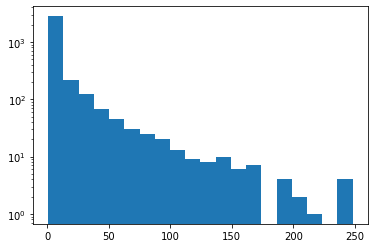

In [13]:
# Escala logarítmica
plt.hist(seq_grados, bins=20)
plt.yscale("log")

El mayor número de escalas para ir de un aeropuerto a otro es:

In [14]:
# Diámetro del grafo
print("Diámetro:", nx.diameter(G_max))

Diámetro: 13


Los aeropuertos más lejanos entre sí son:

In [15]:
# Nodos con mayor distancia
periferie = nx.periphery(G_max)
print("Nodos con mayor distancia:", periferie)

Nodos con mayor distancia: ['YZG', 'QUV', 'SVR', 'LPS', 'YPO']


Entre 'YZG' y 'QUV' se deben realizar las siguientes escalas:

In [16]:
print(nx.shortest_path(G_max, 'YZG', 'QUV'))

['YZG', 'YIK', 'AKV', 'YPX', 'YGL', 'YUL', 'ZRH', 'CPH', 'SFJ', 'UAK', 'JJU', 'JNN', 'XEQ', 'QUV']


El aeropuerto con mayor cantidad de conexiones es:

In [22]:
# Grado máximo
print("Grado maximo:", max(seq_grados))
# Nodos con mayor grado
print("Nodos con mayor grado:", [nodo for nodo, grado in G_max.degree() if grado == max(seq_grados)])

Grado maximo: 248
Nodos con mayor grado: ['AMS']


### 4. Visualización de grafos

El grafo de los aeropuertos con conexión a 'UIO' es:

In [23]:
# Tomo el subgrafo que tenga distancia 1 a 'ACC'
subgrafo = nx.ego_graph(G_max, 'UIO', radius=1)
# Número de nodos
print("Numero de nodos:", subgrafo.number_of_nodes())
# Número de aristas
print("Numero de aristas:", subgrafo.number_of_edges())
# Grado medio
print("Grado medio:", np.mean(list(dict(subgrafo.degree()).values())))
# Connectividad
print("Connectividad:", nx.is_connected(subgrafo))

Numero de nodos: 27
Numero de aristas: 119
Grado medio: 8.814814814814815
Densidad: 0.33903133903133903
Connectividad: True


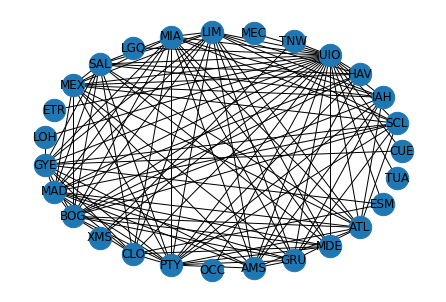

In [42]:
# Genero un posicionamiento de los nodos
pos = nx.circular_layout(subgrafo)
# Grafico el grafo
nx.draw(subgrafo, pos, with_labels=True, node_size=500)

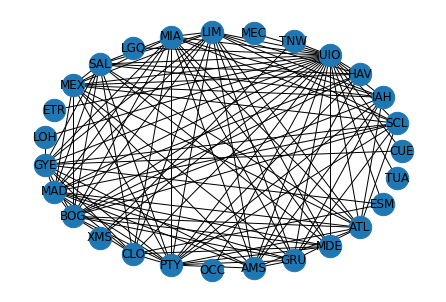

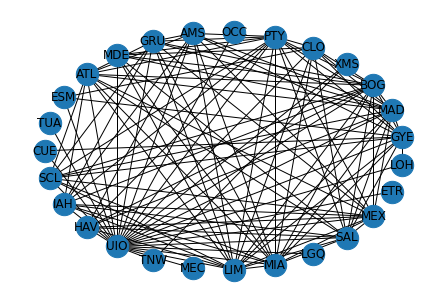

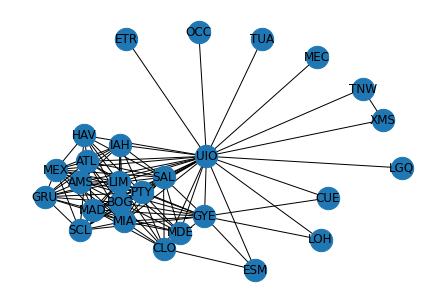

In [44]:
# Reviso varios posicionamientos
posiciones = [nx.circular_layout(subgrafo),
              nx.shell_layout(subgrafo),
              nx.spring_layout(subgrafo)
              ]
# Grafico los grafos
for pos in posiciones:
    nx.draw(subgrafo, pos, with_labels=True, node_size=500)
    plt.show()

Realizo el grafo sobre un mapa:

In [32]:
# !pip install geopandas

C:\Users\aemerinot\AppData\Local\Temp\ipykernel_16656\1460317695.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


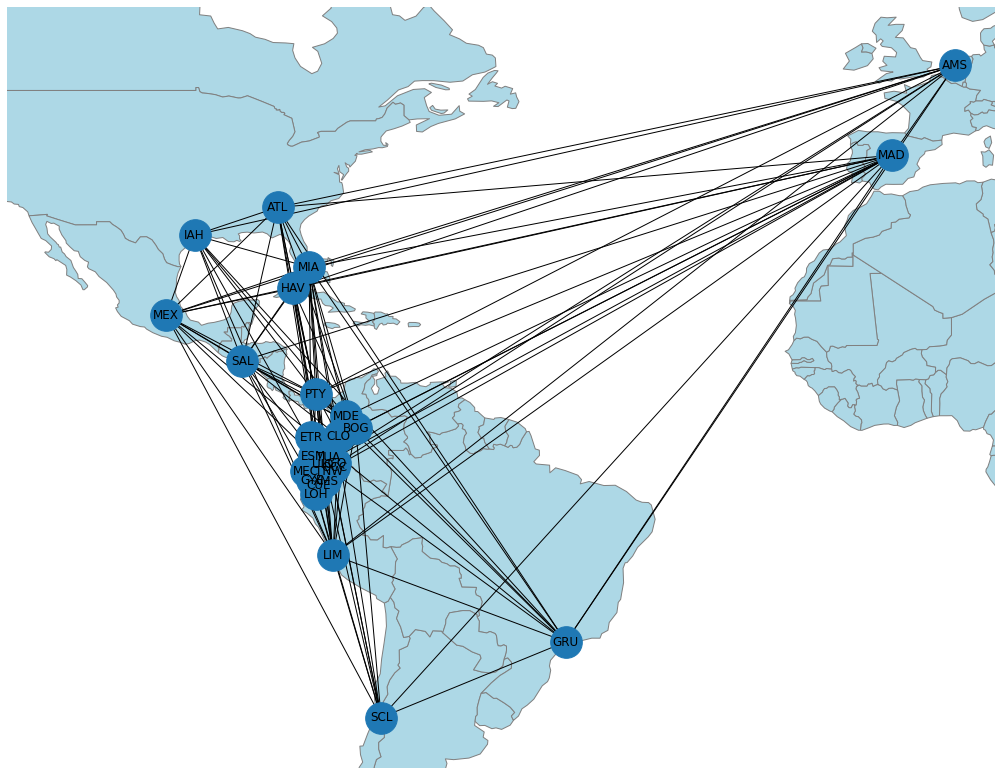

In [38]:
# importo la libreria GeoPandas
import geopandas as gpd
# leo el archivo de mapa mundi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Dibujo el mapa mundi
ax = world.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", figsize=(18, 14))
# Establezco los límites del mapa
ax.axis([-120, 10, -40, 60])
# asignar posiciones a los nodos según latitud y longitud de la tabla nodes
pos = {row['id']: (row['longitude'], row['latitude']) for n, row in nodes.iterrows()}
# dibujo el grafo
nx.draw(subgrafo, pos, with_labels=True, node_size=1000)
plt.show()